In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mobilenetepoch150/mobilenet-epoch147-val63.h5
/kaggle/input/epoch70/modelnet-epoch70-val58.h5
/kaggle/input/model-file/models.py


In [2]:
# Downloading dataset
!wget "https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=1"
!wget "https://www.dropbox.com/s/c94io61nmldcgv8/test.zip?dl=1"
!unzip -q train.zip?dl=1
!unzip -q test.zip?dl=1
!rm train.zip?dl=1
!rm test.zip?dl=1

--2020-04-15 06:59:52--  https://www.dropbox.com/s/h5yora9j0onglw6/train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/h5yora9j0onglw6/train.zip [following]
--2020-04-15 06:59:52--  https://www.dropbox.com/s/dl/h5yora9j0onglw6/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d78464a2f0efad8336a95ed57.dl.dropboxusercontent.com/cd/0/get/A16I4mtcQFWLE6GgupRvXA3F_tTOYrO5Kl4rUjlzBXuVtFeF_8JpDUEMT-T2_69eaBveemfYwM8R61gc_vNw8WgLp-acC_PrHGJK_iR0n7RdpQ/file?dl=1# [following]
--2020-04-15 06:59:52--  https://uc4d78464a2f0efad8336a95ed57.dl.dropboxusercontent.com/cd/0/get/A16I4mtcQFWLE6GgupRvXA3F_tTOYrO5Kl4rUjlzBXuVtFeF_8JpDUEMT-T2_69eaBveemfYwM8R61gc_vNw8WgLp-acC_PrHGJK_iR0n7RdpQ/file?dl=1
Resolving uc4d78464a2

In [3]:
!unzip -q train.zip?dl=1.1

unzip:  cannot find or open train.zip?dl=1.1, train.zip?dl=1.1.zip or train.zip?dl=1.1.ZIP.

No zipfiles found.


In [4]:
!rm train.zip?dl=1
!rm test.zip?dl=1
# !rm test.zip?dl=1.2

rm: cannot remove 'train.zip?dl=1': No such file or directory
rm: cannot remove 'test.zip?dl=1': No such file or directory


In [5]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization



Using TensorFlow backend.


In [6]:
# !pip uninstall tensorflow
# !pip install tensorflow-gpu==1.14
import tensorflow
print(tensorflow.__version__)

2.1.0


In [7]:
# # from ../input/mri-model-file import model
# import os
# os.chdir("/kaggle/input/")
# import models
# print(os.listdir("."))
# model = models.mri_model_2()
# model.summary()
# os.chdir("/kaggle/working/")

In [8]:
# model = mri_model_2()
base = keras.applications.mobilenet.MobileNet(weights='imagenet')
last_layer=base.layers[-2].output
layers = Dropout(0.3)(last_layer)
layers = Dense(23,activation='softmax')(layers)
model = Model(base.input,outputs=layers)
# model.summary()

17227776/17225924 [==============================] - 0s 0us/step


In [9]:
!ls ../input
# model = keras.models.load_model('../input/mobilenetepoch150/mobilenet-epoch147-val63.h5')
# model.summary()
for layer in model.layers:
    layer.trainable=False

for layer in model.layers[-16:]:
    layer.trainable = True
    
model.summary()

epoch70  mobilenetepoch150  model-file
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchN

In [10]:
import keras
from keras import *
import time
from keras.callbacks import ModelCheckpoint

In [11]:
_DATASET_FILEPATH = "train/"
_TEST_FILEPATH = "test/"
_IMAGES_HEIGHT, _IMAGES_WIDTH = 224,224
_BATCH_SIZE = 100

train_generator = keras.preprocessing.image.ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  rotation_range=90,
)

train_flow = train_generator.flow_from_directory(
  directory=_DATASET_FILEPATH,
  target_size=(_IMAGES_HEIGHT, _IMAGES_WIDTH),
  batch_size=_BATCH_SIZE,
  class_mode='categorical',
)

# validation_generator = keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255)

# validation_flow = validation_generator.flow_from_directory(
#   directory=_VALIDATION_FILEPATH,
#   target_size=(_IMAGES_HEIGHT, _IMAGES_WIDTH),
#   batch_size=_BATCH_SIZE,
#   class_mode='categorical',
# )

test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_flow = test_generator.flow_from_directory(
  directory=_TEST_FILEPATH,
  target_size=(_IMAGES_HEIGHT, _IMAGES_WIDTH),
  batch_size=_BATCH_SIZE,
  class_mode='categorical',
)

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.metrics_names

['loss', 'accuracy']

In [13]:
from keras.applications.resnet50 import ResNet50
from keras import Input
from keras.layers import Flatten,Dense
# resnet_model = ResNet50(input_shape=[80,80,3], include_top=False,weights='imagenet')
# # model.summary()
# last_layer = resnet_model.layers[-1].output
# x= Flatten(name='flatten')(last_layer)
# out = Dense(23, activation='softmax', name='output_layer')(x)
# model = Model(inputs=resnet_model.layers[0].output,outputs= out)

# for layer in model.layers:
#     layer.trainable = True

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.summary()

In [14]:
# from keras.models import load_model
# !ls ../input
# model = load_model("../input/resnet-weights-improvement-62-0.38.h5")
# loss,accuracy = model.evaluate_generator(generator=test_flow)
# print("[INFO] Model loss: "+str(loss)+"   Accuracy:"+str(accuracy))

In [15]:
!find  . -name 'resnet*' -exec rm {} \;

In [16]:
t = time.time()
logdir=""
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
filepath="mobilenet-scratch-recent-3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
h=model.fit_generator(generator=train_flow,validation_data=test_flow,epochs=30,callbacks=[checkpoint])
loss,accuracy = model.evaluate_generator(generator=test_flow)
print("[INFO] Model loss: "+str(loss)+"   Accuracy:"+str(accuracy)+"  Time: "+str(time.time()-t))
model.save("mobilenet_model_scratch.h5")
print("[INFO] Model Saved")

Epoch 1/30
156/156 [==============================] - 291s 2s/step - loss: 3.8827 - accuracy: 0.2296 - val_loss: 10.9523 - val_accuracy: 0.0620

Epoch 00001: val_accuracy improved from -inf to 0.06197, saving model to mobilenet-scratch-recent-3.h5
Epoch 2/30
156/156 [==============================] - 272s 2s/step - loss: 2.3074 - accuracy: 0.3249 - val_loss: 5.8267 - val_accuracy: 0.0972

Epoch 00002: val_accuracy improved from 0.06197 to 0.09720, saving model to mobilenet-scratch-recent-3.h5
Epoch 3/30
156/156 [==============================] - 272s 2s/step - loss: 2.0980 - accuracy: 0.3750 - val_loss: 5.1716 - val_accuracy: 0.0982

Epoch 00003: val_accuracy improved from 0.09720 to 0.09820, saving model to mobilenet-scratch-recent-3.h5
Epoch 4/30
156/156 [==============================] - 272s 2s/step - loss: 1.9636 - accuracy: 0.4116 - val_loss: 3.4137 - val_accuracy: 0.1479

Epoch 00004: val_accuracy improved from 0.09820 to 0.14793, saving model to mobilenet-scratch-recent-3.h5
Ep

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


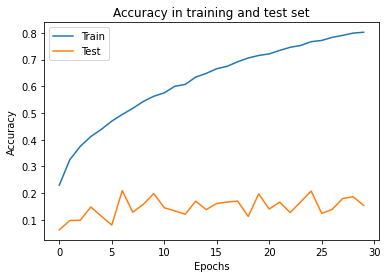

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

h.history.keys()
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Accuracy in training and test set")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"], loc = 'upper_left')
plt.show()

In [18]:
!rm -r train
!rm -r test

In [19]:
# if tensorflow.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")